<a href="https://colab.research.google.com/github/wolerood/Colab_AGU_IMIT/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B0%D0%B9%D1%82%D0%BE%D0%BD_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B53_7_%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving competition_1.csv to competition_1 (3).csv


In [ ]:
df = pd.read_csv('/content/competition_1.csv',decimal=",", sep=";") 
#print(df.iloc[106])
df

,Фамилия,Имя,Пол,Год рождения,"Бег 1000 метров, мин. и сек.","Бег 30 метров, сек.","Прыжок в длину с места, см"
0,Абдуллаев,Денис,м,1998,3.42,4.72,188
1,Абдуллаев,Темур,м,1999,5.12,5.63,187
2,Абраменцев,Владислав,м,1997,5.52,5.42,223
3,Абсалямов,Илья,м,1999,5.43,4.92,237
4,Авдонин,Александр,м,1998,4.38,4.71,219
...,...,...,...,...,...,...,...
995,Янов,Артем,м,1998,5.25,5.73,188
996,Ярагина,Мария,ж,1997,4.02,5.72,216
997,Яруллина,Татьяна,ж,1997,3.30,4.27,208
998,Яцко,Иван,м,1996,4.22,5.06,183


In [ ]:
df.describe()

1.Блок. Pandas 



In [ ]:
df = pd.read_csv('/content/competition_1.csv',decimal=",", sep=";") 
#print(df.iloc[106])
df


1.1)  среднее значение и медиану бега на 100 метров (мин, сек) по каждой возрастной группе (год рождения есть) по девочкам и мальчикам; 

In [ ]:
#Ответ
dfo = df.groupby(['Пол', 'Год рождения']).agg({'Бег 1000 метров, мин. и сек.': ['mean','median']})#. reset_index()
dfo

Бег 1000 метров, мин. и сек.       
                                         mean median
Пол Год рождения                                    
ж   1996                             4.565191   4.45
    1997                             4.534388   4.38
    1998                             4.672073   4.52
    1999                             4.633924   4.52
м   1996                             4.607339   4.47
    1997                             4.606771   4.48
    1998                             4.624286   4.43
    1999                             4.586082   4.47

1.2)  определить победителей (фамилии и имена детей) в каждой возрастной группе по мальчикам и по девочкам (3 первых места) по каждому виду. Учесть, что победителей может бытьбольше 3-х, так как результаты могут совпадать; 


In [ ]:
# места в дисциплинах c учетом возраста и пола

#prevent SettingWithCopyWarning message from appearing/отключаем предупреждения
pd.options.mode.chained_assignment = None

dfn = df.copy()
dfn = dfn.reindex (columns = df.columns.tolist() + ['win1000', 'win30','winjump'])

win = {'Бег 1000 метров, мин. и сек.':'win1000', 'Бег 30 метров, сек.':'win30','Прыжок в длину с места, см ':'winjump'}
vid = ('Бег 1000 метров, мин. и сек.', 'Бег 30 метров, сек.','Прыжок в длину с места, см ')

for d in vid:
  for old, sub_df in dfn.groupby('Год рождения'):
      for sex, subsub_df in sub_df.groupby('Пол'):
        
        win_index1000 = sorted(list(set(subsub_df['Бег 1000 метров, мин. и сек.'].tolist())))
        win_index30 = sorted(list(set(subsub_df['Бег 30 метров, сек.'].tolist())))
        win_index_j = list(set(subsub_df['Прыжок в длину с места, см '].tolist()))#
        win_index_j.sort(reverse=True) #места прыжка в длинну сортируем в обратном порядке

        for i,row in subsub_df.iterrows():
          subsub_df['win1000'] = subsub_df.apply(lambda row: 1+(win_index1000.index(row['Бег 1000 метров, мин. и сек.'])), axis=1)
          subsub_df['win30'] = subsub_df.apply(lambda row: 1+(win_index30.index(row['Бег 30 метров, сек.'])), axis=1)
          subsub_df['winjump'] = subsub_df.apply(lambda row: 1+ (win_index_j.index(row['Прыжок в длину с места, см '])), axis=1)
        
        s = subsub_df.sort_values(win[d])
        t = s[(s[win[d]]<4)]

        #переименование столбцов
        t.rename(columns={d: 'результат', win[d]: 'место'}, inplace = True )
           
        print(old, sex, d) 
        print(t[['Фамилия','Имя', 'результат', 'место']])
        print('--------------------------------------------------') 


1996 ж Бег 1000 метров, мин. и сек.
          Фамилия        Имя  результат  место
426       Коркина  Анастасия       3.28      1
333       Иванова       Анна       3.30      2
849  Трапезникова      Мария       3.33      3
--------------------------------------------------
1996 м Бег 1000 метров, мин. и сек.
      Фамилия     Имя  результат  место
144    Бурсов  Никита       3.28      1
101  Бессонов  Кирилл       3.30      2
129   Бохонов   Антон       3.33      3
--------------------------------------------------
1997 ж Бег 1000 метров, мин. и сек.
       Фамилия        Имя  результат  место
595    Мошкина    Татьяна       3.28      1
106   Бирюкова      Злата       3.28      1
185  Гайдамака  Екатерина       3.28      1
997   Яруллина    Татьяна       3.30      2
797   Соколова      Марта       3.32      3
--------------------------------------------------
1997 м Бег 1000 метров, мин. и сек.
     Фамилия      Имя  результат  место
920  Чеканов  Евгений       3.28      1
266  Дроздо

1.3)  определить в каждой возрастной группе девочек, которые по трём видам (по всем) испытаний входят в ТОП5; 

In [ ]:
##@title ТОП девочек в каждой возрастной группе{ run: "auto" }
#@markdown ### ТОП девочек в каждой возрастной группе
TOP = 21 #@param {type:"slider", min:1, max:50, step:1}

ds = df.copy()
ds = ds[(ds['Пол'] == 'ж')]

for old, sub_df in ds.groupby('Год рождения'):
  
  win_index1000 = sorted(list(set(sub_df['Бег 1000 метров, мин. и сек.'].tolist())))
  win_index30 = sorted(list(set(sub_df['Бег 30 метров, сек.'].tolist())))
  win_index_j = list(set(sub_df['Прыжок в длину с места, см '].tolist()))#
  win_index_j.sort(reverse=True) #места прыжка в длинну сортируем в обратном порядке

  for i,row in ds.iterrows():
    sub_df['бег на 1000'] = sub_df.apply(lambda row: 1+(win_index1000.index(row['Бег 1000 метров, мин. и сек.'])), axis=1)
    sub_df['бег на 30'] = sub_df.apply(lambda row: 1+(win_index30.index(row['Бег 30 метров, сек.'])), axis=1)
    sub_df['прыжки'] = sub_df.apply(lambda row: 1+ (win_index_j.index(row['Прыжок в длину с места, см '])), axis=1)
  
  p = sub_df[(sub_df['бег на 1000'] <TOP) & (sub_df['бег на 30'] <TOP)  & (sub_df['прыжки'] <TOP)]

  print(f'ТОП-{TOP} {old} г.р.\n')
  print(p[['Фамилия','Имя', 'бег на 1000', 'бег на 30','прыжки']])
  print('-------------------------------------------------------------') 

       

ТОП-21 1996 г.р.

       Фамилия    Имя  бег на 1000  бег на 30  прыжки
238    Данчина   Юлия           18         10       7
302  Журавлева   Алла            6          4       3
431  Короткова  Софья           20          2      16
-------------------------------------------------------------
ТОП-21 1997 г.р.

      Фамилия      Имя  бег на 1000  бег на 30  прыжки
997  Яруллина  Татьяна            2          8      20
-------------------------------------------------------------
ТОП-21 1998 г.р.

Empty DataFrame
Columns: [Фамилия, Имя, бег на 1000, бег на 30, прыжки]
Index: []
-------------------------------------------------------------
ТОП-21 1999 г.р.

       Фамилия   Имя  бег на 1000  бег на 30  прыжки
303  Журавлева  Анна            9          9       8
-------------------------------------------------------------


Блок 2. MatplotLib 

Создать две Фигуры для графиков, состоящий из нескольких областей (контейнеров)Тип ирешаемая задача – любые. 

Построим стобчатую диаграмму количества м и ж  по возрастам

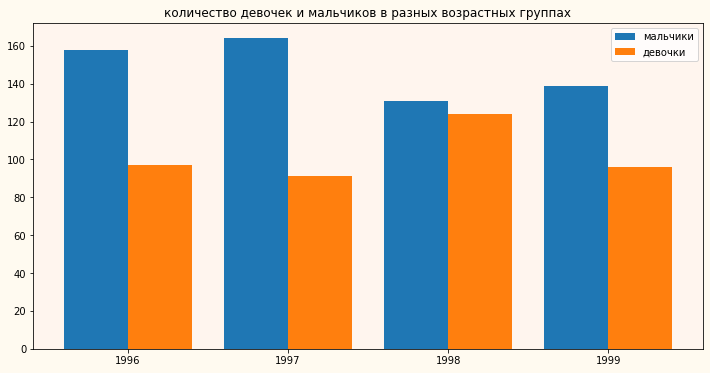

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook 
%matplotlib inline
# адаптация для notebook-а


#формирование данных
dp = df.copy()
m = [];f = [];s = [];o = []

#ось X 
o = pd.unique(dp[['Год рождения']].values.ravel())

#ось Y
for old, sub_df in dp.groupby('Год рождения'):  
  s.append(sub_df.value_counts('Пол').tolist())
   
for i in range (len(s)):
  m.append(s[i][0])
  f.append(s[i][1])

x1 = o - 0.2
x2 = o + 0.2

fig, ax = plt.subplots()

ax.bar(x1, m, width = 0.4, label='мальчики')
ax.bar(x2, f, width = 0.4, label='девочки')

#  Устанавливаем позиции баров:
position = o
ax.set_xticks(position)

#  легенда
ax.legend()

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.title('количество девочек и мальчиков в разных возрастных группах')
plt.show()

Построим линейный график зависимости среднего результата в дисциплинах от возраста м и ж


In [ ]:
dp = df.copy()

y1f=[]; y2f=[]; y3f=[]
y1m=[]; y2m=[]; y3m=[]
o=[]

dp = df[(df['Пол'] == 'м')]
for old, sub_df in dp.groupby('Год рождения'):
  y1f.append((sub_df['Бег 1000 метров, мин. и сек.'].mean()))
for old, sub_df in dp.groupby('Год рождения'):  
  y2f.append(sub_df['Бег 30 метров, сек.'].mean())
for old, sub_df in dp.groupby('Год рождения'):  
  y3f.append(sub_df['Прыжок в длину с места, см '].mean())


dp = df[(df['Пол'] == 'ж')]
for old, sub_df in dp.groupby('Год рождения'):
  y1m.append((sub_df['Бег 1000 метров, мин. и сек.'].mean()))
for old, sub_df in dp.groupby('Год рождения'):  
  y2m.append(sub_df['Бег 30 метров, сек.'].mean())
for old, sub_df in dp.groupby('Год рождения'):  
  y3m.append(sub_df['Прыжок в длину с места, см '].mean())



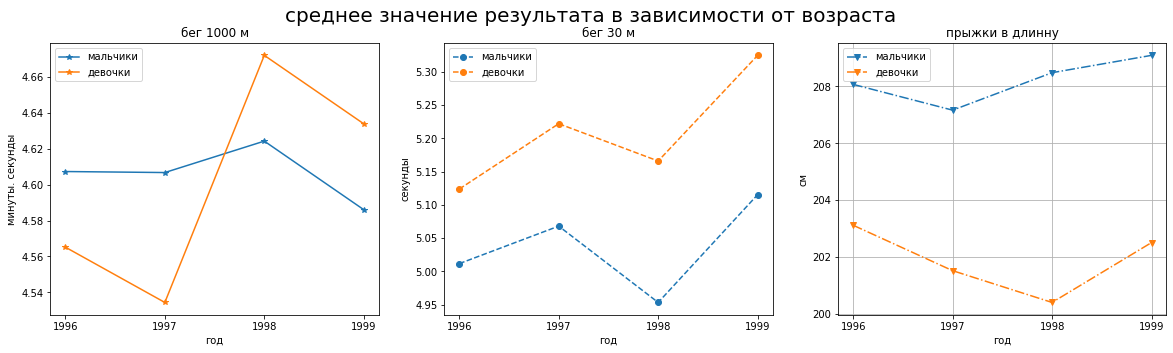

In [ ]:
dp = df.copy()

y1f=[]; y2f=[]; y3f=[]
y1m=[]; y2m=[]; y3m=[]
o=[]

dp = df[(df['Пол'] == 'м')]
for old, sub_df in dp.groupby('Год рождения'):
  y1f.append((sub_df['Бег 1000 метров, мин. и сек.'].mean()))
for old, sub_df in dp.groupby('Год рождения'):  
  y2f.append(sub_df['Бег 30 метров, сек.'].mean())
for old, sub_df in dp.groupby('Год рождения'):  
  y3f.append(sub_df['Прыжок в длину с места, см '].mean())


dp = df[(df['Пол'] == 'ж')]
for old, sub_df in dp.groupby('Год рождения'):
  y1m.append((sub_df['Бег 1000 метров, мин. и сек.'].mean()))
for old, sub_df in dp.groupby('Год рождения'):  
  y2m.append(sub_df['Бег 30 метров, сек.'].mean())
for old, sub_df in dp.groupby('Год рождения'):  
  y3m.append(sub_df['Прыжок в длину с места, см '].mean())

x = pd.unique(dp[['Год рождения']].values.ravel())
x.sort()

#Настройка размеров подложки
plt.figure(figsize=(20,5))
plt.suptitle('среднее значение результата в зависимости от возраста', size = 20)


#вывод графиков
plt.subplot(1,3,1)
plt.title('бег 1000 м')
plt.xlabel('год')
plt.ylabel('минуты. секунды')
plt.xticks(x)
plt.plot(x, y1f, x, y1m, marker='*')
plt.legend(['мальчики', 'девочки'])

plt.subplot(1,3,2)
plt.title('бег 30 м')
plt.xlabel('год')
plt.ylabel('секунды')
plt.xticks(x)
plt.plot(x, y2f,'--', x, y2m, '--', marker='o')
plt.legend(['мальчики', 'девочки'])

plt.subplot(1,3,3)
plt.title('прыжки в длинну')
plt.xlabel('год')
plt.ylabel('см')
plt.xticks(x)
plt.plot(x, y3f,'-.', x , y3m, '-.',marker='v')
plt.grid(True)
plt.legend(['мальчики', 'девочки'])

plt.show()

Создать три скрипичных диаграммы: категориальная переменная – год рождения, пол, год рождения и пол (hue) 

In [ ]:
import seaborn as sns

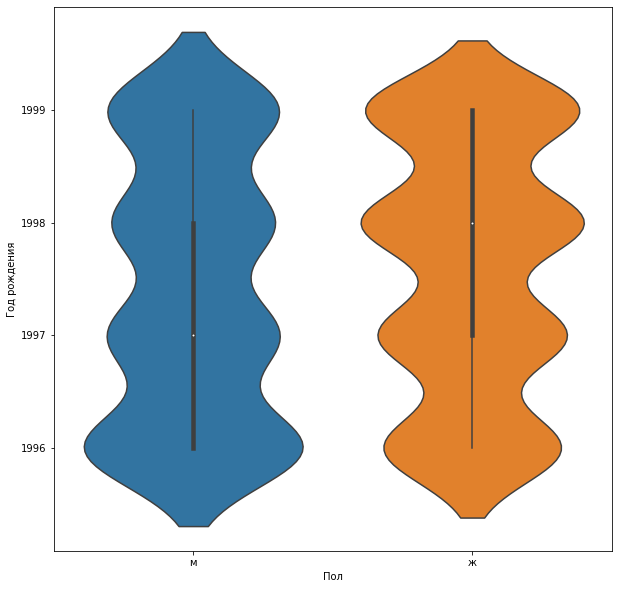

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(  x='Пол', y="Год рождения", data=df)
plt.show()


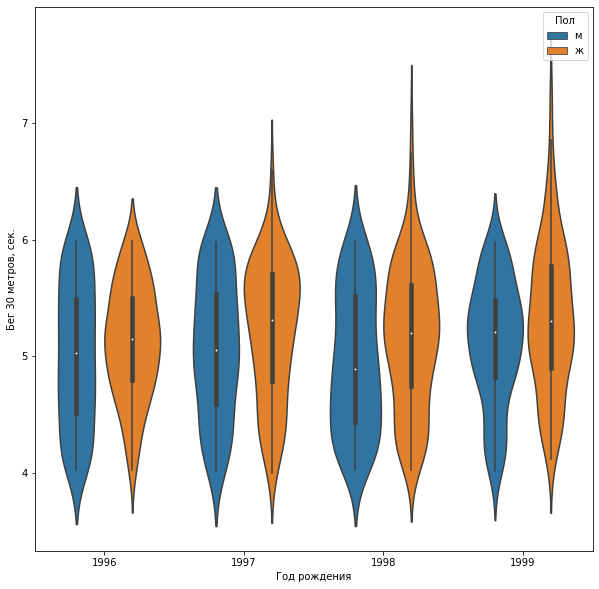

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(  x='Год рождения', y='Бег 30 метров, сек.', data=df, hue='Пол')
plt.show()

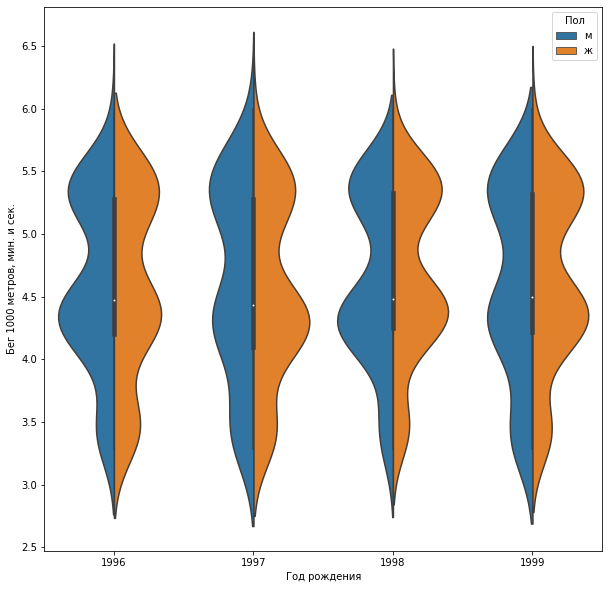

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(  x='Год рождения', y='Бег 1000 метров, мин. и сек.', data=df, hue='Пол', split=True)
plt.show()